<a href="https://colab.research.google.com/github/javohir-ergashboyev/ML-projects/blob/main/DiabetDiagnose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.shape

(768, 9)

In [5]:
cor_matrix=df.corr().abs()
cor_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [20]:
X=df.drop('Outcome', axis=1).copy()
Y=df['Outcome'].copy()

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=5)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [28]:
y_predict=knn.predict(xtest)

In [29]:
from sklearn.metrics import jaccard_score
jaccard_score(ytest,y_predict)

0.4084507042253521

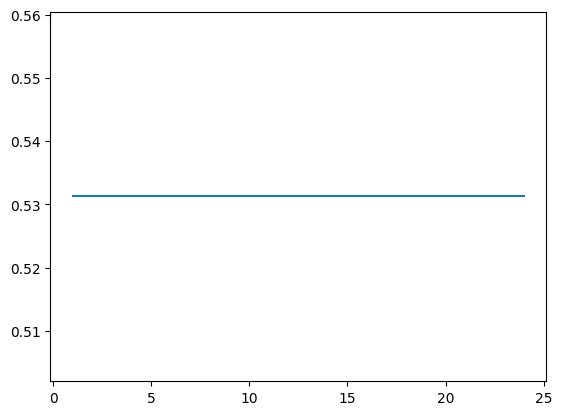

In [19]:
test_outcome=[]
for i in range(1,25):
  knn_test=KNeighborsClassifier(n_neighbors=i)
  knn_test.fit(xtrain, ytrain)
  res=knn.predict(xtrain)
  test_outcome.append(jaccard_score(ytrain,res))
plt.plot(range(1,25),test_outcome)
plt.show()

**2 STEP: Increse accuracy**

In [ ]:
# prompt: draw pair plot for df

sns.pairplot(df)
plt.show()

In [32]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [37]:
# prompt: find the index that outcome is 0 and convert it into array

remover=df.index[df.Outcome == 0].to_numpy()
remover

array([  1,   3,   5,   7,  10,  12,  18,  20,  21,  27,  28,  29,  30,
        32,  33,  34,  35,  36,  40,  41,  42,  44,  46,  47,  49,  50,
        51,  52,  54,  55,  57,  58,  59,  60,  62,  63,  65,  67,  68,
        69,  71,  73,  74,  75,  76,  77,  79,  80,  81,  82,  83,  85,
        86,  87,  89,  90,  91,  92,  94,  95,  96,  97,  98, 101, 102,
       103, 104, 105, 106, 107, 108, 112, 113, 117, 118, 119, 121, 122,
       123, 126, 127, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       144, 145, 146, 147, 148, 149, 150, 151, 153, 156, 157, 158, 160,
       161, 162, 163, 166, 167, 168, 169, 172, 173, 174, 176, 178, 180,
       181, 182, 183, 184, 190, 191, 194, 196, 200, 201, 202, 203, 204,
       205, 208, 210, 211, 212, 217, 222, 223, 224, 225, 226, 228, 229,
       232, 233, 234, 239, 240, 241, 244, 246, 247, 248, 249, 250, 251,
       252, 253, 256, 257, 258, 260, 262, 263, 265, 267, 268, 271, 272,
       273, 274, 275, 277, 278, 279, 281, 282, 285, 286, 288, 28

In [66]:
# prompt: delete random 200 raws which index is in remover

df_balanced=df.drop(df.index[np.random.choice(remover, 220, replace=False)])
df_balanced.Outcome.value_counts()

0    280
1    268
Name: Outcome, dtype: int64

In [67]:
X=df_balanced.drop('Outcome', axis=1).copy()
Y=df_balanced['Outcome'].copy()

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [69]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=5)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [71]:
y_predict=knn.predict(xtest)

In [72]:
from sklearn.metrics import jaccard_score
jaccard_score(ytest,y_predict)

0.43283582089552236

**3 STEP Increase accuracy**

In [47]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [57]:
df_corr=df_balanced[['Glucose','Pregnancies','Age','BMI']].copy()
X=df_corr

In [61]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
Y=df_balanced['Outcome'].copy()

In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=5)

In [63]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [64]:
y_predict=knn.predict(xtest)

In [65]:
jaccard_score(ytest,y_predict)

0.5753424657534246

**4 STEP Increse accuracy**

In [73]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
